In [3]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import random as rnd
from scipy.ndimage import filters
from PIL import Image
from numpy import *
from pylab import *
from pandas import *

In [11]:
def plotImage(title,image):
    plt.figure(figsize=(20,12))
    gray()
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

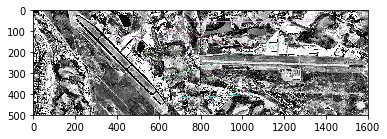

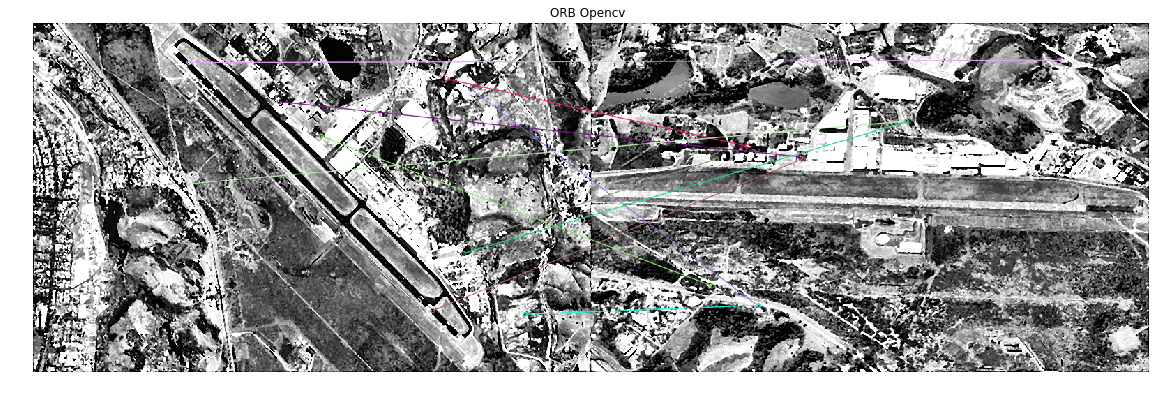

In [5]:
orb = cv2.ORB_create()
imgA = cv2.imread('imagens/img_1.png', 0)
imgB = cv2.imread('imagens/img_2.png', 0)
kpA, desA = orb.detectAndCompute(imgA,None)
kpB, desB = orb.detectAndCompute(imgB,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desA,desB)
matches = sorted(matches, key = lambda x:x.distance)

        
#gray1 = cv2.cvtColor(imgA,cv2.COLOR_BGR2GRAY)
#gray2 = cv2.cvtColor(imgB,cv2.COLOR_BGR2GRAY)
#img3 = cv2.drawMatchesKnn(imgA,kpA,imgB,kpB,good,flags=2)
img3 = cv2.drawMatches(imgA,kpA,imgB,kpB,matches[:10], None,flags=2)
plt.imshow(img3)
plt.show()
plotImage("ORB Opencv  ", img3) 

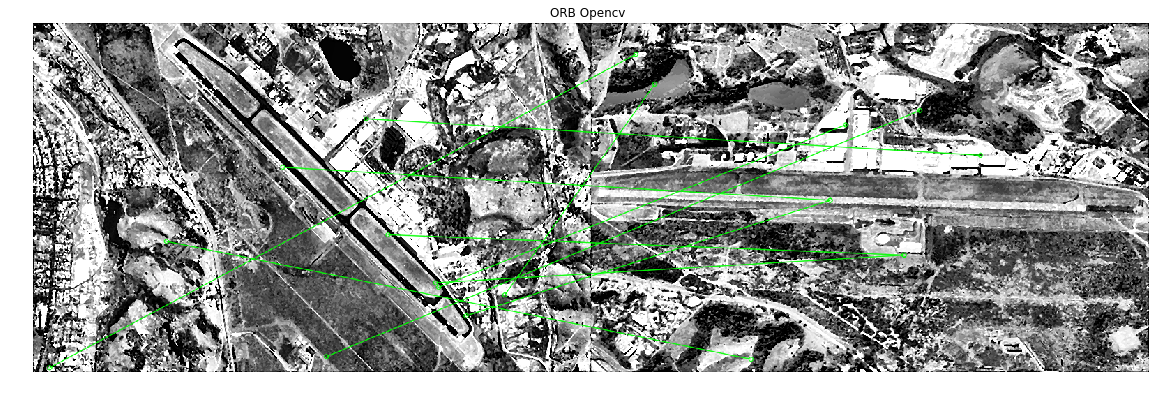

In [6]:

MIN_MATCH_COUNT = 10
sift = cv2.xfeatures2d.SIFT_create()
img1 = cv2.imread('imagens/img_1.png', 0)
img2 = cv2.imread('imagens/img_2.png', 0)
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    #print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
#plt.imshow(img3, 'gray'),plt.show()
plotImage("ORB Opencv  ", img3)

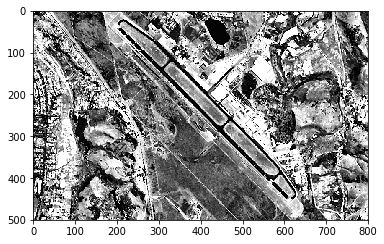

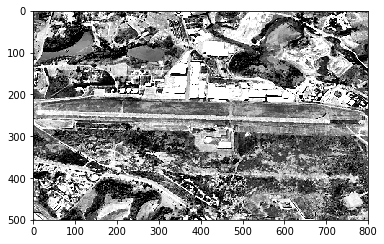

In [36]:
img = cv2.imread('imagens/img_1.png', 0)

def sift_thread(gray):
    sift = cv2.xfeatures2d.SIFT_create()
    (kps, descs) = sift.detectAndCompute(gray, None)
    cv2.drawKeypoints(gray, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(gray)
    plt.show()
    #cv2.imshow('SIFT Algorithm', img)
    #plotImage("ORB Opencv  ", img)

def surf_thread(gray):
    surf = cv2.xfeatures2d.SURF_create()
    (kps2, descs2) = surf.detectAndCompute(gray, None)
    cv2.drawKeypoints(gray, kps2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img2)
    plt.show()
    #cv2.imshow('SURF Algorithm', img2)
    #plotImage("ORB Opencv  ", img2)
    
def fast_thread(gray):
	fast = cv2.FastFeatureDetector_create()
	kps3 = fast.detect(gray, None)
	cv2.drawKeypoints(gray, kps3, img3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
	#cv2.imshow('FAST Algorithm', img3)
    #plotImage("ORB Opencv  ", img3)
    
def orb_thread(gray):
	orb = cv2.ORB_create()
	kps4 = orb.detect(gray, None)
	(kps4, des4) = orb.compute(gray, kps4)
	cv2.drawKeypoints(gray, kps4, img4, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
	#cv2.imshow('ORB Algorithm', img4)
    #plotImage("ORB Opencv  ", img4)


gray = (img)
sift_thread(gray)
surf_thread(gray)

